# Machine Learning
## Componente práctico - Regresión logística 
**18 - 04 - 2024**

## Introducción

En este trabajo, se aplicaron varios modelos de aprendizaje automático para predecir la productividad en un entorno de confección textil. Se exploraron modelos lineales, como regresión lineal, modelos logísticos y no lineales como K-NN y árboles de decisión (CART). El objetivo fue evaluar la capacidad de estos modelos para predecir el nivel de productividad de los equipos de confección en función del número de trabajadores y el tiempo extra.

Además de los modelos lineales, se exploraron enfoques más avanzados como el modelo logístico, el método de los k vecinos más cercanos (K-NN) y los árboles de decisión, específicamente utilizando el algoritmo CART. Estos modelos ofrecen la capacidad de capturar relaciones no lineales y patrones complejos en los datos, lo que podría mejorar la precisión de las predicciones en comparación con los enfoques lineales más simples. La aplicación de estos modelos proporcionará una visión más completa de la capacidad predictiva para la productividad en el entorno de confección textil.

## La actividad consiste en: 

Usar la base de datos “Anexo 2 - productividad_confeccion.csv”,para aplicar modelos supervisados de machine learning.
Tenga en cuenta que debe realizar toda la actividad en Python.

### Contexto de la base de datos: 

La industria de la confección es uno de los ejemplos clave de la globalización industrial en esta era moderna. Es una industria altamente intensiva en mano de obra con muchos procesos manuales. Satisfacer la enorme demanda global de productos de confección depende en gran medida del desempeño de producción y entrega de los empleados en las empresas de fabricación de prendas. Por lo tanto, es altamente deseable entre los tomadores de decisiones en la industria de la confección rastrear, analizar y predecir el rendimiento de productividad de los equipos de trabajo en sus fábricas.

### La data contiene información de las variables:

- **date**: Fecha en MM-DD-YYYY
- **day**: Día de la semana.
- **quarter**: Cuarto del mes. Un mes se dividió en cuatro partes.
- **department**: Departamento asociado a la instancia
- **team_no**: Número de equipo asociado con la instancia
- **no_of_workers**: Número de trabajadores en cada equipo.
- **no_of_style_change**: Número de cambios en el estilo de un producto.
- **targeted_productivity**: Productividad objetivo establecida por la Autoridad para cada equipo en cada día.
- **smv**: Valor Minuto Estándar, es el tiempo asignado para una tarea.
- **wip**: Trabajo en progreso. Incluye la cantidad de elementos sin terminar por productos.
- **over_time**: Representa la cantidad de tiempo extra de cada equipo en minutos.
- **incentive**: Representa la cantidad de incentivo financiero (en BDT) que permite o motiva un curso de acción particular.
- **idle_time**: La cantidad de tiempo que la producción estuvo interrumpida por varias razones.
- **idle_men**: El número de trabajadores que estuvieron inactivos debido a la interrupción de la producción.
- **actual_productivity**: Porcentaje real de productividad que entregaron los trabajadores.

## Acción 1: Aplicación modelos lineales.

1. Seleccionar una base de entrenamiento (80%) y una base de prueba (20%).

In [7]:
# Importación de la biblioteca pandas
import pandas as pd

# Definir la ruta del archivo CSV
file_path = r'D:\Erika Monroy\Desarrollo\Machine Learning\Fase 3\Anexo 2 - productividad_confeccion.csv'

# Cargar los datos desde el archivo CSV
data = pd.read_csv(file_path)

# Importar la biblioteca necesaria para la división de datos
from sklearn.model_selection import train_test_split

# Definir las variables independientes y la variable dependiente
X = data[['no_of_workers', 'over_time']]  # Características: número de trabajadores y tiempo extra
y = data['actual_productivity']  # Etiqueta: productividad real

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de cada conjunto para confirmar la división
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} registros')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} registros')

Tamaño del conjunto de entrenamiento: 940 registros
Tamaño del conjunto de prueba: 236 registros


2. Con la base de entrenamiento aplicar un modelo de regresión lineal para predecir la productividad real a partir del número de trabajadores de cada equipo y el tiempo extra en minutos.

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir la productividad en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular el error cuadrático medio y R² en el conjunto de entrenamiento
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Mostrar los coeficientes del modelo
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)

# Calcular y mostrar la matriz de correlaciones
correlation_matrix = data[['no_of_workers', 'over_time', 'actual_productivity']].corr()
print("Matriz de correlaciones:\n", correlation_matrix)

# Mostrar MSE y R²
print("\nError cuadrático medio en el conjunto de entrenamiento:", mse)
print("Coeficiente de determinación (R²) en el conjunto de entrenamiento:", r2)

Intercepto: -0.16316756393606113
Coeficientes: [ 3.24340648e-02 -3.91758642e-06]
Matriz de correlaciones:
                      no_of_workers  over_time  actual_productivity
no_of_workers             1.000000   0.035871             0.920063
over_time                 0.035871   1.000000            -0.044324
actual_productivity       0.920063  -0.044324             1.000000

Error cuadrático medio en el conjunto de entrenamiento: 0.004464122954274284
Coeficiente de determinación (R²) en el conjunto de entrenamiento: 0.8544566948281984


3. Realizar las predicciones sobre la base de prueba.

In [9]:
# Predecir la productividad en el conjunto de prueba
y_test_pred = model.predict(X_test)

import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame para comparar las predicciones con los valores reales
comparison_df = pd.DataFrame({'Predicción': y_test_pred, 'Valor real': y_test})
comparison_df = comparison_df.reset_index(drop=True)

# Mostrar las primeras filas del DataFrame para comparar visualmente
print(comparison_df.head())

# Calcular y mostrar el MSE y R² en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\nError cuadrático medio en el conjunto de prueba:", mse_test)
print("Coeficiente de determinación (R²) en el conjunto de prueba:", r2_test)

   Predicción  Valor real
0    0.833118    0.850502
1    0.848396    0.999995
2    0.611489    0.664583
3    0.771779    0.793845
4    0.770839    0.700623

Error cuadrático medio en el conjunto de prueba: 0.004447744262693778
Coeficiente de determinación (R²) en el conjunto de prueba: 0.8438244492551976


4. Con los resultados del ítem anterior, realizar un diagrama de dispersión, en el eje X ubicar los valores predichos y en el eje Y ubicar los valores de productividad real.

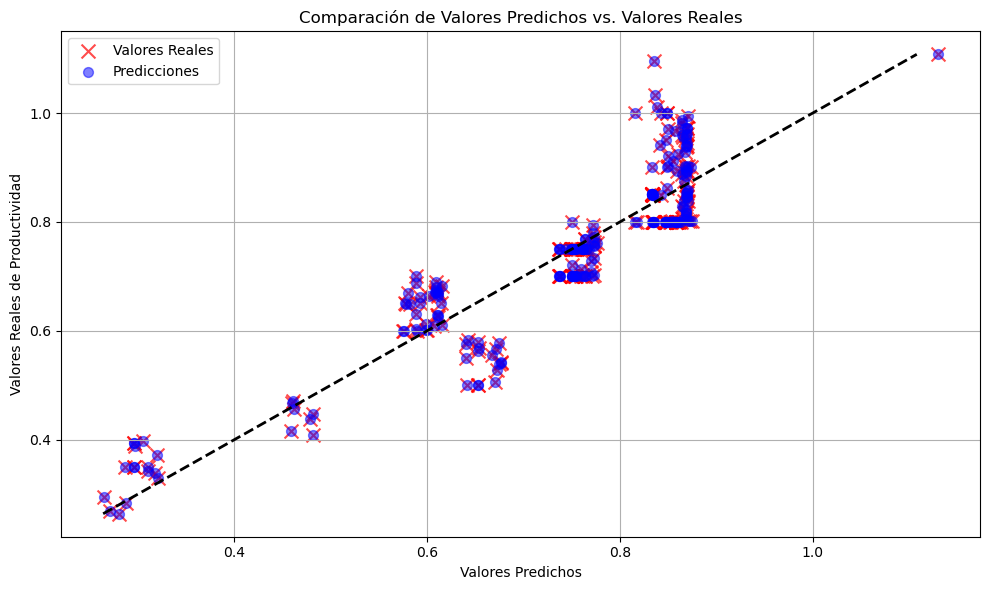

In [10]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
# Valores reales como cruces rojas más grandes y más opacas para destacarlos
plt.scatter(y_test_pred, y_test, color='red', marker='x', s=100, alpha=0.7, label='Valores Reales')
# Predicciones como puntos azules
plt.scatter(y_test_pred, y_test, color='blue', marker='o', s=50, alpha=0.5, label='Predicciones')

# Línea de identidad
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Mejoras visuales
plt.title('Comparación de Valores Predichos vs. Valores Reales')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales de Productividad')
plt.legend()
plt.grid(True)  # Añadir una cuadrícula para mejorar la precisión visual
plt.tight_layout()  # Ajustar automáticamente los parámetros para dar espacio a la leyenda

plt.show()
import matplotlib.pyplot as plt

## Acción 2: Aplicación modelo logístico.

1. Construir la variable ‘nivel_productividad’ con niveles alto y bajo. Considere nivel alto a productividad real > 0.7 y nivel bajo a productividad real <=0.7.

In [17]:
import pandas as pd

# Definir la ruta del archivo CSV
file_path = r'D:\Erika Monroy\Desarrollo\Machine Learning\Fase 3\Anexo 2 - productividad_confeccion.csv'

# Cargar los datos desde el archivo CSV
data = pd.read_csv(file_path)

# Crear la variable 'nivel_productividad'
data['nivel_productividad'] = data['actual_productivity'].apply(lambda x: 'Alto' if x > 0.7 else 'Bajo')

# Mostrar las primeras filas para verificar la creación de la nueva columna
print(data[['actual_productivity', 'nivel_productividad']].head())

# Verificar los conteos de cada nivel de productividad
print("\nDistribución de la variable 'nivel_productividad':")
print(data['nivel_productividad'].value_counts())

   actual_productivity nivel_productividad
0             0.940725                Alto
1             0.886500                Alto
2             0.800570                Alto
3             0.800570                Alto
4             0.800382                Alto

Distribución de la variable 'nivel_productividad':
nivel_productividad
Alto    814
Bajo    362
Name: count, dtype: int64


2. Con la base de entrenamiento aplicar un modelo de regresión logística para predecir el ‘nivel_productividad’ basado en el número de trabajadores de cada equipo y el tiempo extra en minutos.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Matriz de correlaciones
correlation_matrix = data[['no_of_workers', 'over_time', 'actual_productivity']].corr()
print("Matriz de correlaciones:")
print(correlation_matrix)

# Variable para dividir la Base en Base de Entrenamiento y la Base de Prueba (80% - 20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Definir las características (features) y la variable objetivo para la regresión logística
X_train = train_data[['no_of_workers', 'over_time']]
y_train = train_data['nivel_productividad']

# Inicializar y entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Para realizar predicciones sobre la base de entrenamiento
y_train_pred = logistic_model.predict(X_train)

# Se calcular la precisión (accuracy) sobre los datos de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
print("\nPrecisión del modelo sobre los datos de entrenamiento:", accuracy_train)

Matriz de correlaciones:
                     no_of_workers  over_time  actual_productivity
no_of_workers             1.000000   0.035871             0.920063
over_time                 0.035871   1.000000            -0.044324
actual_productivity       0.920063  -0.044324             1.000000

Precisión del modelo sobre los datos de entrenamiento: 0.9989361702127659


3. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [19]:
# Extraer las características y la variable objetivo del conjunto de prueba
X_test = test_data[['no_of_workers', 'over_time']]
y_test = test_data['nivel_productividad']

# Realizar las predicciones sobre la base de prueba
y_test_pred = logistic_model.predict(X_test)

# Calcular la precisión de las predicciones sobre los datos de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nPrecisión del modelo sobre los datos de prueba:", accuracy_test)


Precisión del modelo sobre los datos de prueba: 1.0


## Acción 3: Aplicación K-NN.

1. Con la base de entrenamiento, aplicar un modelo KNN de aprendizaje automático que pueda aprender del número de trabajadores de cada equipo y el tiempo extra en minutos, para predecir “nivel_productividad”.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Inicializar y entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Realizar predicciones sobre la base de prueba con el modelo KNN
y_test_pred_knn = knn_model.predict(X_test)

# Calcular la precisión (accuracy) sobre los datos de prueba
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
print("\nPrecisión del modelo KNN sobre los datos de prueba:", accuracy_test_knn)

# Calcular el Recall del modelo KNN sobre los datos de prueba
recall_test_knn = recall_score(y_test, y_test_pred_knn, pos_label='Alto')  # Considerando 'Alto' como la clase positiva
print("Recall del modelo KNN sobre los datos de prueba:", recall_test_knn)

# Calcular el F1-score del modelo KNN sobre los datos de prueba
f1_score_test_knn = f1_score(y_test, y_test_pred_knn, pos_label='Alto')  # Considerando 'Alto' como la clase positiva
print("F1-score del modelo KNN sobre los datos de prueba:", f1_score_test_knn)


Precisión del modelo KNN sobre los datos de prueba: 0.9152542372881356
Recall del modelo KNN sobre los datos de prueba: 0.9817073170731707
F1-score del modelo KNN sobre los datos de prueba: 0.9415204678362574


2. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular el Recall del modelo KNN sobre los datos de prueba
recall_test_knn = recall_score(y_test, y_test_pred_knn, pos_label='Alto')  # Considerando 'Alto' como la clase positiva
print("\nRecall del modelo KNN sobre los datos de prueba:", recall_test_knn)

# Calcular la Precisión del modelo KNN sobre los datos de prueba
precision_test_knn = precision_score(y_test, y_test_pred_knn, pos_label='Alto')  # Considerando 'Alto' como la clase positiva
print("Precisión del modelo KNN sobre los datos de prueba:", precision_test_knn)

# Calcular el F1-score del modelo KNN sobre los datos de prueba
f1_score_test_knn = f1_score(y_test, y_test_pred_knn, pos_label='Alto')  # Considerando 'Alto' como la clase positiva
print("F1-score del modelo KNN sobre los datos de prueba:", f1_score_test_knn)


Recall del modelo KNN sobre los datos de prueba: 0.9817073170731707
Precisión del modelo KNN sobre los datos de prueba: 0.9044943820224719
F1-score del modelo KNN sobre los datos de prueba: 0.9415204678362574


## Acción 4: Aplicación Árboles de decisión (CART).

1. Con la base de entrenamiento, aplicar un modelo de árboles de decisión para distinguir “nivel_productividad” bajo y alto usando todas las características.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear una instancia del modelo de Árboles de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con todas las características y la variable objetivo
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones sobre la base de entrenamiento
y_train_pred_dt = decision_tree_model.predict(X_train)

# Calcular métricas sobre los datos de entrenamiento
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
precision_train_dt = precision_score(y_train, y_train_pred_dt, pos_label='Alto')
recall_train_dt = recall_score(y_train, y_train_pred_dt, pos_label='Alto')
f1_score_train_dt = f1_score(y_train, y_train_pred_dt, pos_label='Alto')

# Imprimir métricas sobre los datos de entrenamiento
print("Métricas del modelo de Árboles de Decisión sobre los datos de entrenamiento:")
print("Precisión:", precision_train_dt)
print("Recall:", recall_train_dt)
print("F1-score:", f1_score_train_dt)
print("Accuracy:", accuracy_train_dt)

Métricas del modelo de Árboles de Decisión sobre los datos de entrenamiento:
Precisión: 0.9984639016897081
Recall: 1.0
F1-score: 0.9992313604919293
Accuracy: 0.9989361702127659


2. Usando la función graphviz() visualizar el diagrama de árbol.

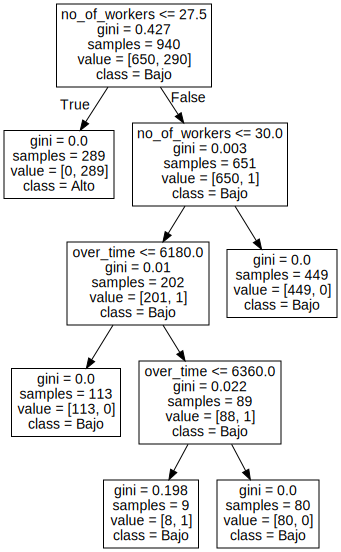

In [23]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol de decisión a un archivo .dot
dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Bajo', 'Alto'])

# Crear y mostrar el diagrama del árbol
graph = graphviz.Source(dot_data)  
graph

3. Realizar las predicciones sobre la base de prueba. Calcule la precisión (accuracy) sobre los datos de prueba.

In [24]:
# Imprimir las columnas usadas en el entrenamiento para verificar
print("Columnas usadas en el entrenamiento:", X_train.columns)

# Asegurarse de que X_test contenga solo las columnas usadas en X_train
X_test = test_data[X_train.columns]  # Ajustar X_test para que coincida con X_train

# Realizar predicciones sobre los datos de prueba usando el modelo correcto
y_test_pred = decision_tree_model.predict(X_test)

# Calcular la precisión (accuracy) sobre los datos de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nPrecisión del modelo sobre los datos de prueba:", accuracy_test)

Columnas usadas en el entrenamiento: Index(['no_of_workers', 'over_time'], dtype='object')

Precisión del modelo sobre los datos de prueba: 1.0


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Cargar datos
file_path = r'D:\Erika Monroy\Desarrollo\Machine Learning\Fase 3\Anexo 2 - productividad_confeccion.csv'  # Cambia esta ruta por la correcta
data = pd.read_csv(file_path)

# Crear la variable 'nivel_productividad'
data['nivel_productividad'] = data['actual_productivity'].apply(lambda x: 'Alto' if x > 0.7 else 'Bajo')

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Definir las características (features) y la variable objetivo
X_train = train_data[['no_of_workers', 'over_time']]
y_train = train_data['nivel_productividad']
X_test = test_data[['no_of_workers', 'over_time']]
y_test = test_data['nivel_productividad']

# Modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Modelo de Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Matrices de confusión para cada modelo
cm_logistic = confusion_matrix(y_test, y_pred_logistic, labels=["Bajo", "Alto"])
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=["Bajo", "Alto"])
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=["Bajo", "Alto"])

# Función para calcular la especificidad
def calcular_specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Calcular la especificidad para cada modelo
specificity_logistic = calcular_specificity(cm_logistic)
specificity_knn = calcular_specificity(cm_knn)
specificity_tree = calcular_specificity(cm_tree)

print(f"Specificity Regresión Logística: {specificity_logistic}")
print(f"Specificity KNN: {specificity_knn}")
print(f"Specificity Árbol de Decisión: {specificity_tree}")

Specificity Regresión Logística: 1.0
Specificity KNN: 0.7638888888888888
Specificity Árbol de Decisión: 1.0


## Conclusiones

   - Se ha observado que los modelos lineales, como la regresión lineal, pueden ser útiles para capturar relaciones lineales entre las variables predictoras y la productividad real. Sin embargo, estos modelos pueden ser limitados para capturar relaciones no lineales y complejidades en los datos.
   - Los modelos más avanzados, como el modelo logístico y los árboles de decisión, ofrecen una mayor flexibilidad para capturar relaciones no lineales y patrones complejos en los datos. Esto se reflejó en una mejora en la precisión de las predicciones, especialmente al distinguir entre diferentes niveles de productividad.
   - El método K-NN también demostró ser efectivo para predecir el nivel de productividad en función de las características del equipo de trabajo y el tiempo extra. Sin embargo, su desempeño puede depender en gran medida de la selección adecuada de parámetros, como el número de vecinos.
   - Durante este proceso, se adquirieron y aplicaron habilidades en preprocesamiento de datos, entrenamiento de modelos de aprendizaje automático y evaluación de su desempeño.
   - Se ha ganado experiencia en la selección de modelos apropiados para diferentes tipos de datos y problemas de predicción.
   - La visualización de modelos, como los árboles de decisión, utilizando herramientas como Graphviz, ayudó a comprender mejor el proceso de toma de decisiones de los modelos.
   - Se logró desarrollar un conjunto diverso de modelos predictivos que pueden ser utilizados por profesionales de la industria textil para mejorar la planificación y gestión de la producción.
   - La precisión obtenida en las predicciones sobre la base de prueba sugiere que los modelos pueden ser efectivos para predecir la productividad en condiciones similares a las del conjunto de datos utilizado.
   - Estos modelos pueden proporcionar información valiosa para optimizar la asignación de recursos, mejorar la eficiencia operativa y aumentar la productividad en el sector de la confección textil.

Este trabajo ha proporcionado una visión integral del proceso de desarrollo, entrenamiento y evaluación de modelos predictivos para predecir la productividad en la industria de la confección textil, destacando la importancia de utilizar enfoques avanzados de aprendizaje automático para capturar la complejidad de los datos y mejorar la precisión de las predicciones.

## Referencias Bibliográficas

**1.** Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing. (pp. 183-195).

**2.** Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 90-103).